In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.layers import BatchNormalization


In [3]:
data = pd.read_csv('../data/final_data.csv')

In [9]:
y=data['activity_id']

In [10]:
print(y.shape)
print(data.shape)

(1936481,)
(1936481, 32)


<h1> Model Building</h1>

In [11]:
x = data.drop('activity_id', axis=1)
y = data['activity_id']

In [12]:
y.head()

,activityID
2928,lying
2929,lying
2930,lying
2931,lying
2932,lying


In [13]:
label_encoder = LabelEncoder()
y = label_encoder.fit_transform(y)
y = to_categorical(y,num_classes=12)

In [14]:
y_stratify = np.argmax(y, axis=1)
x_dev, x_test, y_dev, y_test = train_test_split(x, y, test_size=0.3, random_state=42,stratify=y_stratify)

In [15]:
y_dev_stratify = np.argmax(y_dev, axis=1)
x_train, x_val, y_train, y_val = train_test_split(x_dev, y_dev, test_size=0.3, random_state=42,stratify=y_dev_stratify)

<h1> Neural Network </h1>

In [17]:
batch_size = [32,64]
batch_size_adam_models = []
batch_size_adam_accuracy = []
batch_size_adam_history = []

batch_size_sgd_models = []
batch_size_sgd_accuracy = []
batch_size_sgd_history = []

In [ ]:
for batch in batch_size:
 model_normal = Sequential()
 model_normal.add(Dense(32, activation='relu'))
 model_normal.add(BatchNormalization())
 model_normal.add(Dense(32, activation='relu'))
 model_normal.add(BatchNormalization())
 model_normal.add(Dense(64, activation='relu'))
 model_normal.add(BatchNormalization())
 model_normal.add(Dense(12, activation='softmax'))
 model_normal.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
 model = model_normal.fit(x_train, y_train,validation_data=(x_val,y_val), epochs=15, batch_size=batch)
 batch_size_adam_models.append(model_normal)
 batch_size_adam_accuracy.append(model.history['val_accuracy'][-1])
 batch_size_adam_history.append(model)

In [ ]:
for batch in batch_size:
 model_normal = Sequential()
 model_normal.add(Dense(32, activation='relu'))
 model_normal.add(BatchNormalization())
 model_normal.add(Dense(32, activation='relu'))
 model_normal.add(BatchNormalization())
 model_normal.add(Dense(64, activation='relu'))
 model_normal.add(BatchNormalization())
 model_normal.add(Dense(12, activation='softmax'))
 model_normal.compile(optimizer='SGD', loss='categorical_crossentropy', metrics=['accuracy'])
 model = model_normal.fit(x_train, y_train,validation_data=(x_val,y_val), epochs=15, batch_size=batch)
 batch_size_sgd_models.append(model_normal)
 batch_size_sgd_accuracy.append(model.history['val_accuracy'][-1])
 batch_size_sgd_history.append(model)

In [20]:
adam_index = np.argmax(batch_size_adam_accuracy)
best_adam_model = batch_size_adam_models[adam_index]
sgd_index = np.argmax(batch_size_sgd_accuracy)
best_sgd_model = batch_size_sgd_models[sgd_index]

if batch_size_adam_accuracy[adam_index] > batch_size_sgd_accuracy[sgd_index]:
  best_model = best_adam_model
else:
  best_model = best_sgd_model

In [21]:
best_model

<Sequential name=sequential_1, built=True>

18155/18155 ━━━━━━━━━━━━━━━━━━━━ 27s 1ms/step
Test Set Accuracy of the best model is : 0.9950

Confusion Matrix:



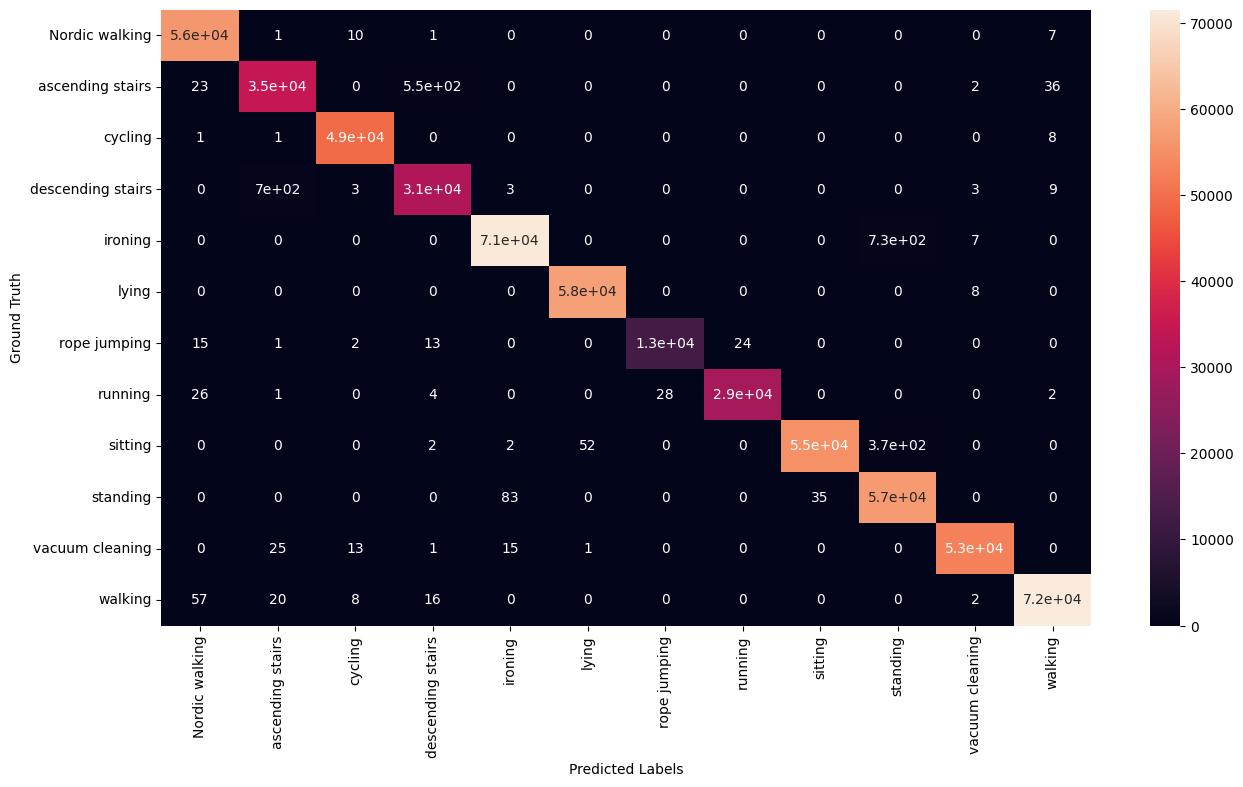


Classification Report:

              precision    recall  f1-score   support

           0     0.9978    0.9997    0.9988     56432
           1     0.9787    0.9827    0.9807     35165
           2     0.9993    0.9998    0.9995     49380
           3     0.9814    0.9771    0.9793     31483
           4     0.9985    0.9897    0.9941     71607
           5     0.9991    0.9999    0.9995     57757
           6     0.9978    0.9957    0.9968     12891
           7     0.9992    0.9979    0.9986     29460
           8     0.9994    0.9924    0.9958     55557
           9     0.9810    0.9979    0.9894     56979
          10     0.9996    0.9990    0.9993     52606
          11     0.9991    0.9986    0.9988     71628

    accuracy                         0.9950    580945
   macro avg     0.9942    0.9942    0.9942    580945
weighted avg     0.9950    0.9950    0.9950    580945



In [ ]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

y_test_pred_prob = best_model.predict(x_test)
y_test_pred = np.argmax(y_test_pred_prob, axis=1)
y_test_actual = np.argmax(y_test, axis=1)


accuracy = accuracy_score(y_test_actual, y_test_pred)
print(f"Test Set Accuracy of the best model is : {accuracy:.4f}")


cm = confusion_matrix(y_test_actual, y_test_pred)
print("\nConfusion Matrix:\n")
y_num = np.argmax(y, axis=1)
y_labels = label_encoder.inverse_transform(y_num)
class_names = np.unique(y_labels)
plt.figure(figsize=(15, 8))
sns.heatmap(cm, annot=True, xticklabels=class_names, yticklabels=class_names)
plt.xlabel('Predicted Labels')
plt.ylabel('Ground Truth')
plt.show()



print("\nClassification Report:\n")
print(classification_report(y_test_actual, y_test_pred,digits=4))
